# Convolution Neural Network 

Use LeNet-5, one of representative deep nueral networks, to solve a  classification problem with Fashion MNIST benchmark.




### Library Preparation

Import useful deep learning packages. 



In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

### Training Data Preparation

Import useful packages and prepare Fashion MNIST data.

**References**
- Fashion MNIST https://github.com/zalandoresearch/fashion-mnist


4422102/4422102 [==============================] - 0s 0us/step


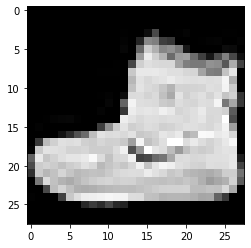

label: Ankle boot  index: 9
x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [2]:
# the data, split between train and test sets with keras.datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


# Model / data parameters
num_classes = 10
input_shape = (32, 32, 1) 

# Image Normalization 
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255 

# Naming classifications
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print out first image and its correponding label index
image = x_train[0]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print("label:", class_names[y_train[0]], " index:",y_train[0])

# Dimension expansion to ensure that images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Conduct padding on training/test images to (32, 32, 1) for LeNet-5
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Print out the training/test data shapes and the numbers of training/test samples
print("x_train shape:", x_train.shape) 
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert label vectors to binary class matrices for training/test labels 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

###  LeNet-5 

Construct LeNet-5 as learning model for Fashion MNIST classification task.



In [3]:
from tensorflow.keras import regularizers
keras.backend.clear_session()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5),  activation="relu" ), #C1
        layers.MaxPooling2D(pool_size=(2, 2)), # S2 Subsampling
        layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5),  activation="relu" ), # C3
        layers.MaxPooling2D(pool_size=(2, 2)), # S4 Subsampling
        layers.Flatten(), # Convert 2D convolution layer to 1D fully connected layer
        layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5),  activation="relu" ), # C5
        layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5),  activation="relu" ), # F6
        layers.Dense(num_classes,  activation="softmax" ), # OUTPUT
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

#### LeNet-5 Model Training

Train LeNet-5 model with specific training strategy.

expect the **BEST** validation accuracy is above **87%** 

In [4]:
# Train with SGD optimizer with learning rate = 0.1, regularizer = 4e-5, momentum = 0.9, and nesterov = True

batch_size = 64
epochs = 10
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
844/844 [==============================] - 50s 55ms/step - loss: 0.6040 - accuracy: 0.7823 - val_loss: 0.4561 - val_accuracy: 0.8382
Epoch 2/10
844/844 [==============================] - 35s 42ms/step - loss: 0.3933 - accuracy: 0.8621 - val_loss: 0.4059 - val_accuracy: 0.8598
Epoch 3/10
844/844 [==============================] - 37s 44ms/step - loss: 0.3462 - accuracy: 0.8800 - val_loss: 0.3597 - val_accuracy: 0.8752
Epoch 4/10
844/844 [==============================] - 34s 41ms/step - loss: 0.3180 - accuracy: 0.8896 - val_loss: 0.3169 - val_accuracy: 0.8897
Epoch 5/10
844/844 [==============================] - 34s 40ms/step - loss: 0.2970 - accuracy: 0.8966 - val_loss: 0.3119 - val_accuracy: 0.8955
Epoch 6/10
844/844 [==============================] - 35s 41ms/step - loss: 0.2791 - accuracy: 0.9036 - val_loss: 0.3025 - val_accuracy: 0.8970
Epoch 7/10
844/844 [==============================] - 35s 41ms/step - loss: 0.2657 - accuracy: 0.9096 - val_loss: 0.3146 - val_accuracy:

In [5]:
# Print out the evaluation results, including test loss and test accuracy.

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3154926896095276
Test accuracy: 0.8949999809265137
